In [1]:
library("tidyverse")
library("dplyr")
library("ggplot2")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
data <- read.csv("/kaggle/input/quantium-forage-task2/QVI_data.csv")


In [3]:
class(data)

[1] "data.frame"

In [4]:
head(data)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>
1,1000,17-10-2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
2,1002,16-09-2018,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
3,1003,07-03-2019,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
4,1003,08-03-2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
5,1004,02-11-2018,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
6,1005,28-12-2018,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream


Considering the monthly sales revenue for each store:


In [5]:
data$month <- format(as.Date(data$DATE), "%m")
data$year <- format(as.Date(data$DATE, format="%d-%m-%Y"), "%Y")

In [6]:
head(data)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,month,year
,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1000,17-10-2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,10,2018
2,1002,16-09-2018,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,09,2018
3,1003,07-03-2019,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,03,2019
4,1003,08-03-2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,03,2019
5,1004,02-11-2018,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,11,2018
6,1005,28-12-2018,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream,12,2018


In [7]:
annual_metrics <- data %>% group_by(month, year, STORE_NBR)  %>% mutate(total_sales_revenue = sum(TOT_SALES), total_customers = n_distinct(LYLTY_CARD_NBR), total_no_chips = sum(PROD_QTY)) %>% mutate(avgNoOfTxn = (count = n()))
annual_metrics <- annual_metrics %>% mutate (avgTxnPerCust = (total_customers/ avgNoOfTxn), nChipsPerTxn = (total_no_chips/avgNoOfTxn)) 
annual_metrics

LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,month,year,total_sales_revenue,total_customers,total_no_chips,avgNoOfTxn,avgTxnPerCust,nChipsPerTxn
<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
1000,17-10-2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,10,2018,188.1,44,58,45,0.9777778,1.288889
1002,16-09-2018,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,09,2018,278.8,59,75,62,0.9516129,1.209677
1003,07-03-2019,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,03,2019,192.9,45,58,49,0.9183673,1.183673
1003,08-03-2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,03,2019,192.9,45,58,49,0.9183673,1.183673
1004,02-11-2018,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,11,2018,192.6,46,57,47,0.9787234,1.212766
1005,28-12-2018,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream,12,2018,189.6,42,57,47,0.8936170,1.212766
1007,04-12-2018,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,INFUZIONS,YOUNG SINGLES/COUPLES,Budget,12,2018,189.6,42,57,47,0.8936170,1.212766
1007,05-12-2018,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Budget,12,2018,189.6,42,57,47,0.8936170,1.212766
1009,20-11-2018,1,9,20,Doritos Cheese Supreme 330g,1,5.7,330,DORITOS,NEW FAMILIES,Premium,11,2018,192.6,46,57,47,0.9787234,1.212766


In [8]:
annual_metrics_final <- annual_metrics %>% select(STORE_NBR, month, year,total_sales_revenue,total_customers,avgTxnPerCust,nChipsPerTxn ) %>% filter(year == 2018 | (year == 2019 & month == '01')) %>% distinct(.keep_all = TRUE)
annual_metrics_final

STORE_NBR,month,year,total_sales_revenue,total_customers,avgTxnPerCust,nChipsPerTxn
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,10,2018,188.10,44,0.9777778,1.288889
1,09,2018,278.80,59,0.9516129,1.209677
1,11,2018,192.60,46,0.9787234,1.212766
1,12,2018,189.60,42,0.8936170,1.212766
1,07,2018,206.90,49,0.9423077,1.192308
1,01,2019,154.80,35,0.9722222,1.166667
1,08,2018,176.10,42,0.9767442,1.255814
2,12,2018,136.00,35,0.9210526,1.052632
2,10,2018,167.80,41,0.9534884,1.046512


annual_metrics_final is a dataframe consisting annual metrics for all the store before trial period, i.e. February 2019.

Extracting the values for store no 77, 86 and 88 out to keep the trial and control stores data seperately.

In [9]:
trial_store_values <- annual_metrics_final %>% filter( (STORE_NBR == 77) || (STORE_NBR == 86) ||(STORE_NBR == 88) )
trial_store_values <- trial_store_values %>% arrange(year , month) 

In [10]:
trial_store_values

STORE_NBR,month,year,total_sales_revenue,total_customers,avgTxnPerCust,nChipsPerTxn
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
77,07,2018,296.80,51,0.9272727,1.527273
86,07,2018,892.20,99,0.7857143,1.992063
88,07,2018,1310.00,129,0.8431373,2.000000
77,08,2018,255.50,47,0.9791667,1.541667
86,08,2018,764.05,94,0.8392857,1.919643
88,08,2018,1323.80,131,0.8187500,1.893750
77,09,2018,225.20,42,0.9545455,1.590909
86,09,2018,914.60,103,0.7984496,2.000000
88,09,2018,1423.00,124,0.7798742,2.000000


Now defining a coorelation measure between each pair of trial and control store possible.

In [11]:
#calculate_coorelation <- function(tr_store, cn_store, criteria){
  #if(criteria == 'salesrev'){
      #corrValue = cor(tr_store$total_sales_revenue,cn_store$total_sales_revenue)
  #}
    #return(corrValue)
#}

#for (i in 1:nrow(trial_store_values)){
    #trial_row <- trial_store_values[i,]
    #for (j in 1:nrow(annual_metrics_final)){
        #control_row <- annual_metrics_final[j,]
        #if((trial_row$month == control_row$month) & (trial_row$year == control_row$year)){
            
        #}
    #}
#}

In [12]:
final_df <- merge(x=annual_metrics_final,y=trial_store_values, by.x=c("month","year"), by.y=c("month","year")) 
head(final_df)

,month,year,STORE_NBR.x,total_sales_revenue.x,total_customers.x,avgTxnPerCust.x,nChipsPerTxn.x,STORE_NBR.y,total_sales_revenue.y,total_customers.y,avgTxnPerCust.y,nChipsPerTxn.y
,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,01,2019,55,1003.2,114,0.8085106,2.000000,86,841.4,94,0.7230769,2.000000
2,01,2019,55,1003.2,114,0.8085106,2.000000,88,1266.4,117,0.8013699,2.000000
3,01,2019,55,1003.2,114,0.8085106,2.000000,77,204.4,35,0.8974359,1.666667
4,01,2019,90,305.8,50,0.9433962,1.641509,86,841.4,94,0.7230769,2.000000
5,01,2019,90,305.8,50,0.9433962,1.641509,88,1266.4,117,0.8013699,2.000000
6,01,2019,90,305.8,50,0.9433962,1.641509,77,204.4,35,0.8974359,1.666667


In [13]:
final_df$TSRDiff <- final_df$total_sales_revenue.x - final_df$total_sales_revenue.y
final_df$TCDiff <- final_df$total_customers.x - final_df$total_customers.y
final_df$TPCDiff <- final_df$avgTxnPerCust.x - final_df$avgTxnPerCust.y
final_df$CPTDiff <- final_df$nChipsPerTxn.x - final_df$nChipsPerTxn.y

In [14]:
head(final_df)

,month,year,STORE_NBR.x,total_sales_revenue.x,total_customers.x,avgTxnPerCust.x,nChipsPerTxn.x,STORE_NBR.y,total_sales_revenue.y,total_customers.y,avgTxnPerCust.y,nChipsPerTxn.y,TSRDiff,TCDiff,TPCDiff,CPTDiff
,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,01,2019,55,1003.2,114,0.8085106,2.000000,86,841.4,94,0.7230769,2.000000,161.8,20,0.085433715,0.00000000
2,01,2019,55,1003.2,114,0.8085106,2.000000,88,1266.4,117,0.8013699,2.000000,-263.2,-3,0.007140775,0.00000000
3,01,2019,55,1003.2,114,0.8085106,2.000000,77,204.4,35,0.8974359,1.666667,798.8,79,-0.088925259,0.33333333
4,01,2019,90,305.8,50,0.9433962,1.641509,86,841.4,94,0.7230769,2.000000,-535.6,-44,0.220319303,-0.35849057
5,01,2019,90,305.8,50,0.9433962,1.641509,88,1266.4,117,0.8013699,2.000000,-960.6,-67,0.142026363,-0.35849057
6,01,2019,90,305.8,50,0.9433962,1.641509,77,204.4,35,0.8974359,1.666667,101.4,15,0.045960329,-0.02515723


In [15]:
#coor_table <- data.frame(control_store_no = numeric(), trial_store_no = numeric(), TSR = numeric(), TC = numeric())

In [16]:
cal_corr_tsr <- function(x, y){
    d <- subset(final_df, (STORE_NBR.x == x & STORE_NBR.y == y))
    v <- cor(d$total_sales_revenue.x, d$total_sales_revenue.y)
    return(v)
    #coor_table %>% add_row(tibble_row(control_store_no = x, trial_store_no = y, TSR = value, TC = 0))
}

In [17]:
cal_corr_tc <- function(x, y){
    d <- subset(final_df, (STORE_NBR.x == x & STORE_NBR.y == y))
    v <- cor(d$total_customers.x, d$total_customers.y)
    return(v)
    #coor_table %>% add_row(tibble_row(control_store_no = x, trial_store_no = y, TSR = value, TC = 0))
}

In [18]:
STORE_NBR.x =  c()
STORE_NBR.y =  c()
TSR_value = c()
TC_value = c()
counter = 1
trial_store_no = c(77, 86, 88)
for (control_store_no in 1:272){
   for (i in trial_store_no){
       STORE_NBR.x[counter] = control_store_no
       STORE_NBR.y[counter] = i
       TSR_value[counter] = round(cal_corr_tsr(control_store_no, i), digits = 5)
       TC_value[counter] = round(cal_corr_tc(control_store_no, i), digits = 5)
       counter = counter +  1
   }
}

Warning message in cor(d$total_customers.x, d$total_customers.y):
“the standard deviation is zero”
Warning message in cor(d$total_customers.x, d$total_customers.y):
“the standard deviation is zero”
Warning message in cor(d$total_customers.x, d$total_customers.y):
“the standard deviation is zero”
Warning message in cor(d$total_customers.x, d$total_customers.y):
“the standard deviation is zero”
Warning message in cor(d$total_customers.x, d$total_customers.y):
“the standard deviation is zero”
Warning message in cor(d$total_customers.x, d$total_customers.y):
“the standard deviation is zero”


In [19]:
coor_table <- data.frame(STORE_NBR.x, STORE_NBR.y, TSR_value, TC_value)
coor_table <- coor_table %>% drop_na()

In [20]:
coor_table

STORE_NBR.x,STORE_NBR.y,TSR_value,TC_value
<int>,<dbl>,<dbl>,<dbl>
1,77,0.07522,0.32217
1,86,0.44563,0.48583
1,88,0.81364,0.30533
2,77,-0.26308,-0.57205
2,86,-0.40383,-0.08616
2,88,-0.06793,-0.45238
3,77,0.80664,0.83421
3,86,-0.26128,-0.35379
3,88,-0.50785,0.52288


In [21]:
diff_table <- final_df %>% group_by (STORE_NBR.x, STORE_NBR.y) %>% summarize(TSRmag = mean(TSRDiff), TCMag = mean(TCDiff))

`summarise()` has grouped output by 'STORE_NBR.x'. You can override using the
`.groups` argument.


In [22]:
final_table <- merge(coor_table, diff_table) %>% arrange(STORE_NBR.x, STORE_NBR.y)

In [23]:
head(final_table)

,STORE_NBR.x,STORE_NBR.y,TSR_value,TC_value,TSRmag,TCMag
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,77,0.07522,0.32217,-44.58571,2.571429
2,1,86,0.44563,0.48583,-676.13571,-54.285714
3,1,88,0.81364,0.30533,-1142.38571,-80.428571
4,2,77,-0.26308,-0.57205,-81.50000,-3.857143
5,2,86,-0.40383,-0.08616,-713.05000,-60.714286
6,2,88,-0.06793,-0.45238,-1179.30000,-86.857143


In [24]:
final_table$score <- 0.5* final_table$TSR_value + 0.5 * final_table$TC_value

In [25]:
head(final_table)

,STORE_NBR.x,STORE_NBR.y,TSR_value,TC_value,TSRmag,TCMag,score
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,77,0.07522,0.32217,-44.58571,2.571429,0.198695
2,1,86,0.44563,0.48583,-676.13571,-54.285714,0.465730
3,1,88,0.81364,0.30533,-1142.38571,-80.428571,0.559485
4,2,77,-0.26308,-0.57205,-81.50000,-3.857143,-0.417565
5,2,86,-0.40383,-0.08616,-713.05000,-60.714286,-0.244995
6,2,88,-0.06793,-0.45238,-1179.30000,-86.857143,-0.260155


Now looking for the control store for each trial score, ie. 77, 86, 88. 

In [26]:
maxn <- function(n) function(x) order(x, decreasing = TRUE)[n]

In [27]:
temp <- subset(final_table, score!= 1 & STORE_NBR.y== 88)
temp %>% slice(which.max(score))

STORE_NBR.x,STORE_NBR.y,TSR_value,TC_value,TSRmag,TCMag,score
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
178,88,0.73186,0.93947,-405.5857,-22.14286,0.835665


In [28]:
temp <- subset(final_table, STORE_NBR.x== 237 & STORE_NBR.y== 88)
temp

,STORE_NBR.x,STORE_NBR.y,TSR_value,TC_value,TSRmag,TCMag,score
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
687,237,88,0.30848,0.94733,-2.085714,0.7142857,0.627905


In [29]:
temp <- subset(final_table, score!= 1 & STORE_NBR.y== 86)
temp %>% slice(which.max(score))

STORE_NBR.x,STORE_NBR.y,TSR_value,TC_value,TSRmag,TCMag,score
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
155,86,0.87788,0.94288,26.97857,0,0.91038


In [30]:
temp <- subset(final_table, score!= 1 & STORE_NBR.y== 77)
temp %>% slice(which.max(score))

STORE_NBR.x,STORE_NBR.y,TSR_value,TC_value,TSRmag,TCMag,score
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
233,77,0.90377,0.99036,-5.6,-0.1428571,0.947065


As we can see store no 237 is very similar in trends to trial store 88. Store no 155 for trial store no 86 and Store no 233 for trial store no 77. Doing a visual check up for trends between these pairs to ascertain the same.

In [31]:

head(annual_metrics_final)

STORE_NBR,month,year,total_sales_revenue,total_customers,avgTxnPerCust,nChipsPerTxn
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,10,2018,188.1,44,0.9777778,1.288889
1,09,2018,278.8,59,0.9516129,1.209677
1,11,2018,192.6,46,0.9787234,1.212766
1,12,2018,189.6,42,0.8936170,1.212766
1,07,2018,206.9,49,0.9423077,1.192308
1,01,2019,154.8,35,0.9722222,1.166667


In [32]:
library(gridExtra)
library(cowplot)
xlabels <- c("07-2018", "08-2018", "09-2018","10-2018","11-2018","12-2018","01-2019")


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




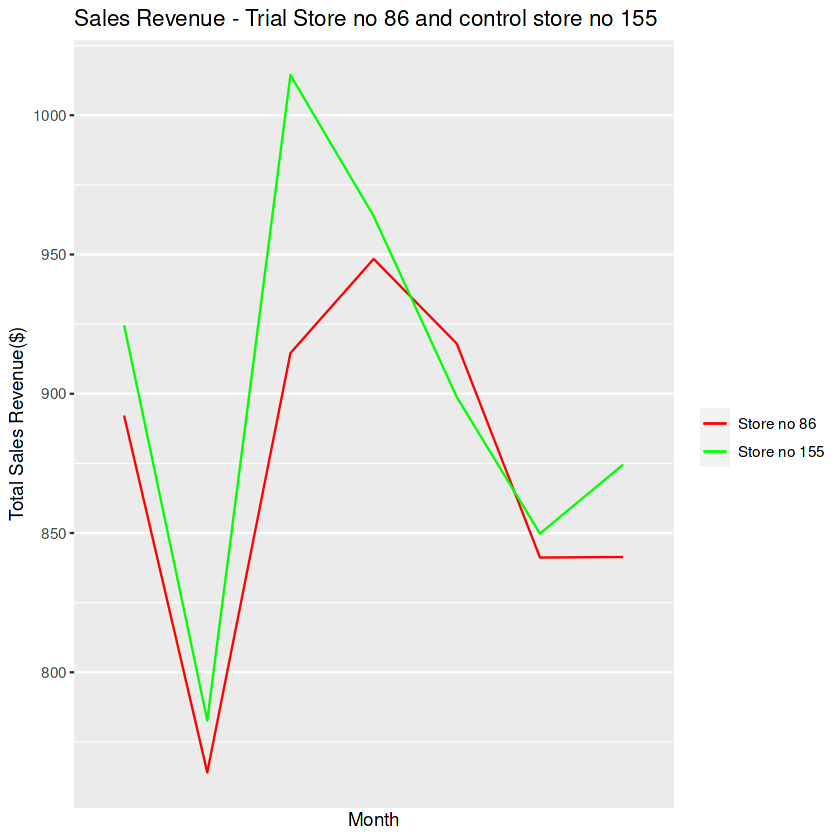

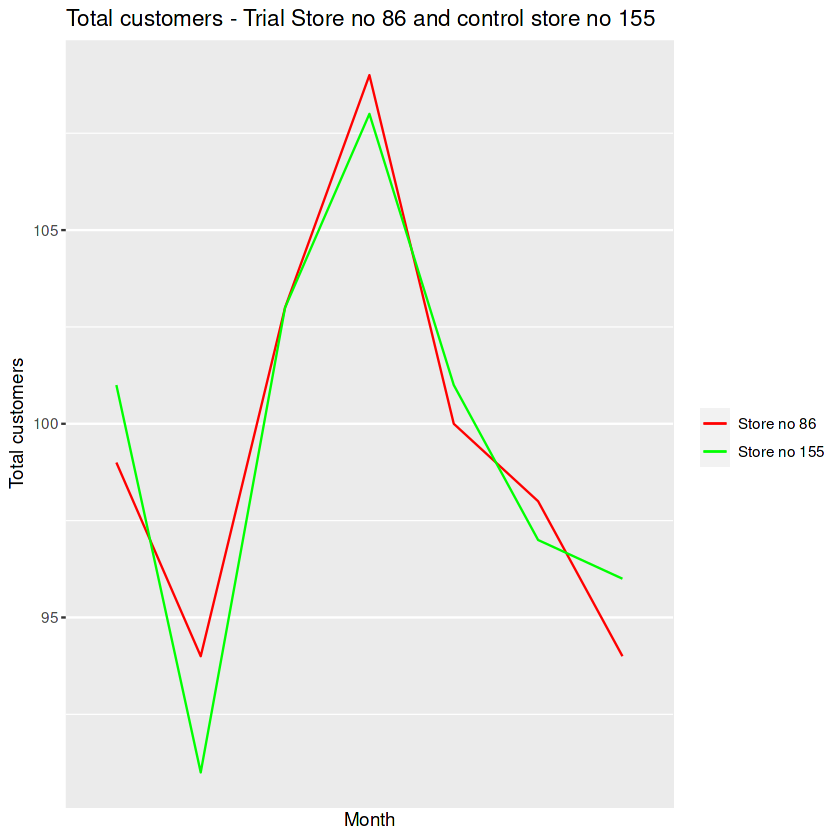

In [33]:
trial <- annual_metrics_final[annual_metrics_final$STORE_NBR == 86, ] %>% arrange(year, month)
trial$index<- c(1,2,3,4,5,6,7)
control <- annual_metrics_final[annual_metrics_final$STORE_NBR == 155, ]%>% arrange(year, month)
control$index<- c(1,2,3,4,5,6,7)
ggplot()+ geom_line(mapping = aes(x= index, y= total_sales_revenue, group = 1, color = "Store no 86"), data = trial) + geom_line(mapping = aes(x= index, y= total_sales_revenue, group = 1, color = "Store no 155"), data = control) + scale_x_discrete(labels= xlabels) + scale_colour_manual("", breaks = c("Store no 86", "Store no 155"),values = c("red", "green")) + ggtitle("Sales Revenue - Trial Store no 86 and control store no 155") + xlab("Month") + ylab("Total Sales Revenue($)") 
ggplot()+ geom_line(mapping = aes(x= index, y= total_customers, group = 1, color = "Store no 86"), data = trial) + geom_line(mapping = aes(x= index, y= total_customers, group = 1, color = "Store no 155"), data = control)+ scale_x_discrete(labels= xlabels) + scale_colour_manual("", breaks = c("Store no 86", "Store no 155"),values = c("red", "green")) + ggtitle("Total customers - Trial Store no 86 and control store no 155") + xlab("Month") + ylab("Total customers") 

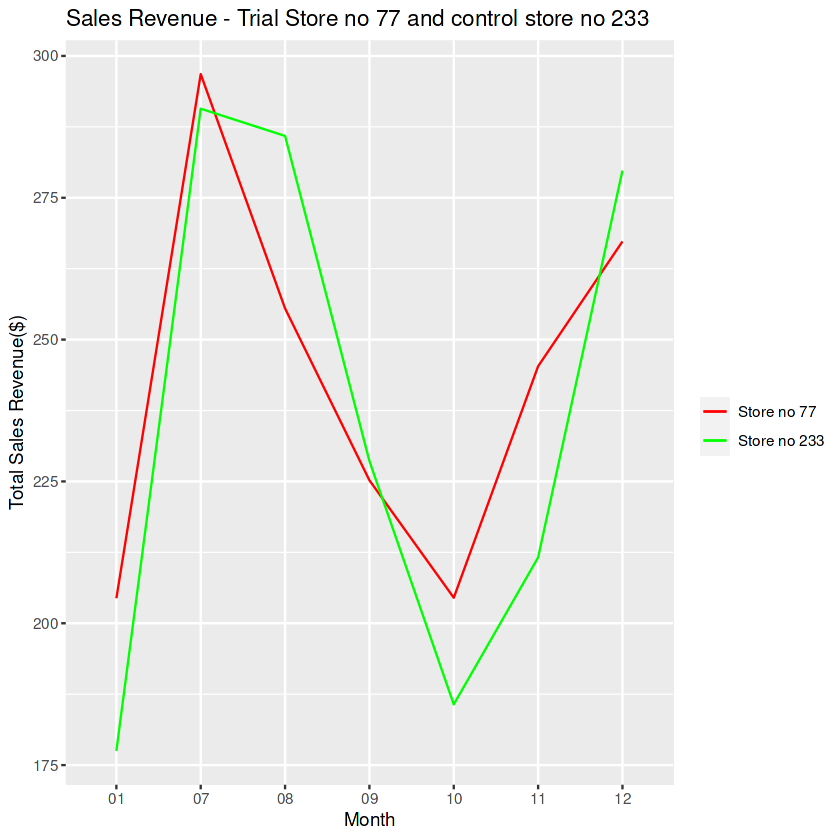

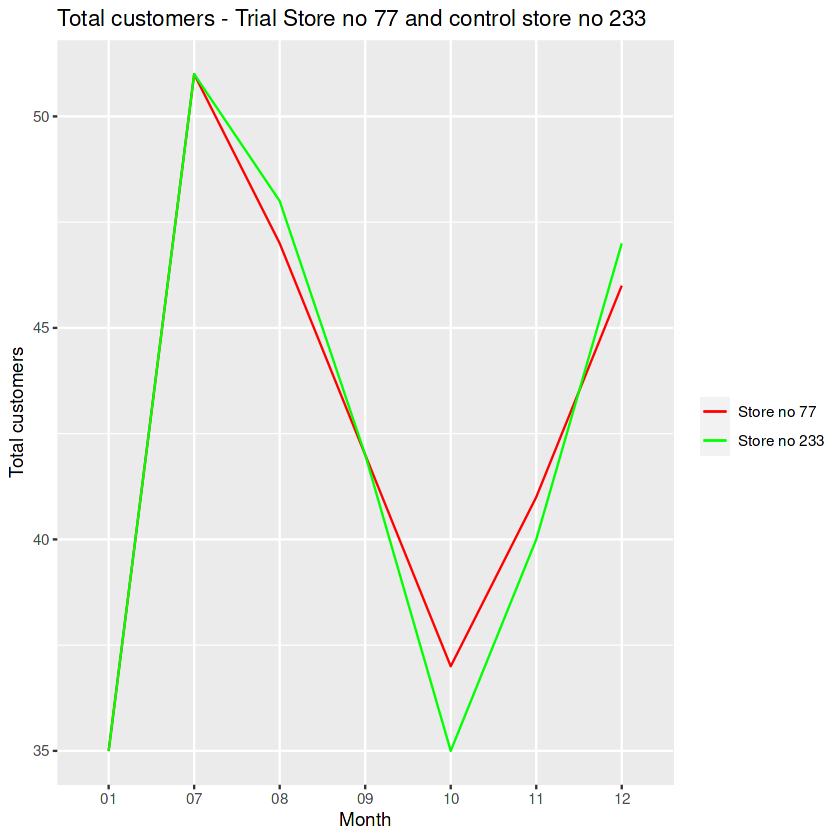

In [34]:
trial <- annual_metrics_final[annual_metrics_final$STORE_NBR == 77, ]
control <- annual_metrics_final[annual_metrics_final$STORE_NBR == 233, ]
#par(mfrow = c(1,2))
ggplot()+ geom_line(mapping = aes(x= month, y= total_sales_revenue, group = 1, color = "Store no 77"), data = trial) + geom_line(mapping = aes(x= month, y= total_sales_revenue, group = 1, color = "Store no 233"), data = control) + scale_colour_manual("", breaks = c("Store no 77", "Store no 233"),values = c("red", "green")) + ggtitle("Sales Revenue - Trial Store no 77 and control store no 233") + xlab("Month") + ylab("Total Sales Revenue($)")
ggplot()+ geom_line(mapping = aes(x= month, y= total_customers, group = 1, color = "Store no 77"), data = trial) + geom_line(mapping = aes(x= month, y= total_customers, group = 1, color = "Store no 233"), data = control) + scale_colour_manual("", breaks = c("Store no 77", "Store no 233"),values = c("red", "green")) + ggtitle("Total customers - Trial Store no 77 and control store no 233") + xlab("Month") + ylab("Total customers")

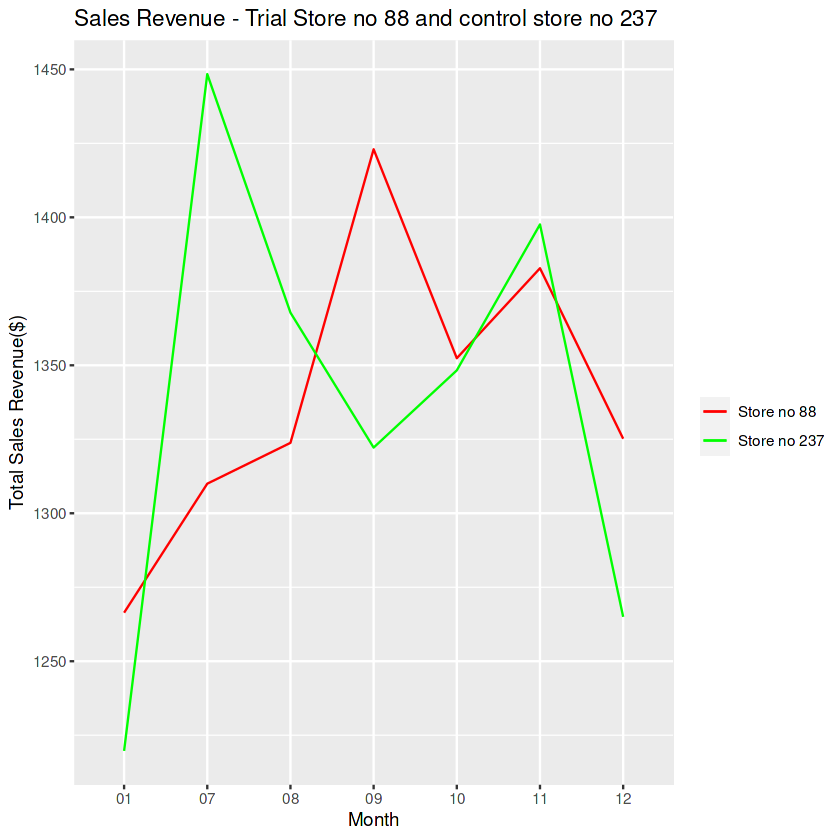

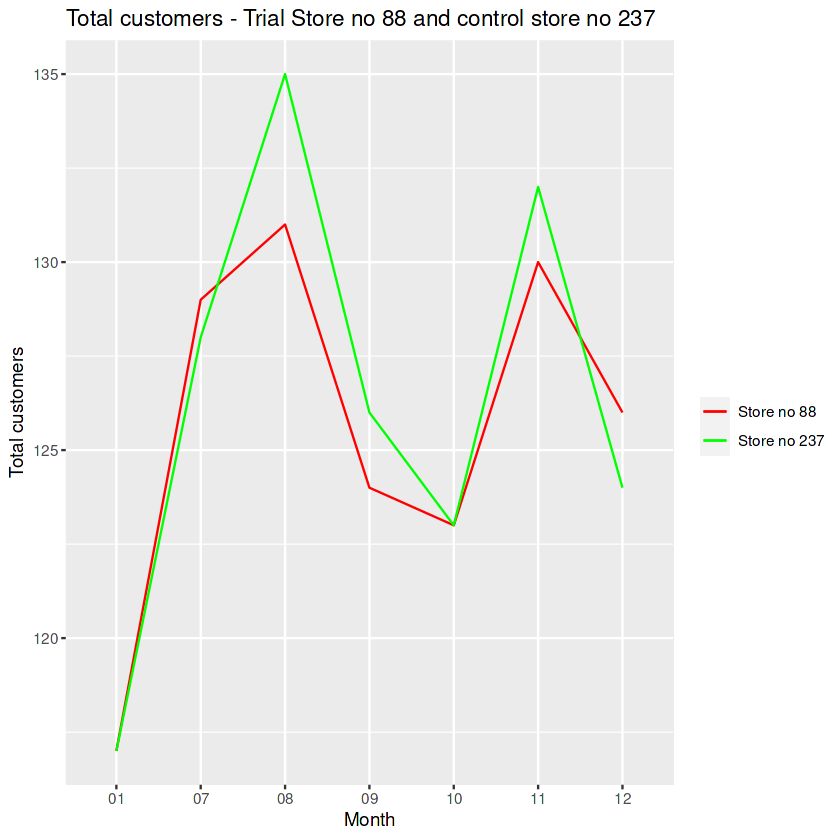

In [35]:
trial <- annual_metrics_final[annual_metrics_final$STORE_NBR == 88, ]
control <- annual_metrics_final[annual_metrics_final$STORE_NBR == 237, ]
#par(mfrow = c(1,2))
ggplot()+ geom_line(mapping = aes(x= month, y= total_sales_revenue, group = 1, color = "Store no 88"), data = trial) + geom_line(mapping = aes(x= month, y= total_sales_revenue, group = 1, color = "Store no 237"), data = control) + scale_colour_manual("", breaks = c("Store no 88", "Store no 237"),values = c("red", "green")) + ggtitle("Sales Revenue - Trial Store no 88 and control store no 237") + xlab("Month") + ylab("Total Sales Revenue($)")
ggplot()+ geom_line(mapping = aes(x= month, y= total_customers, group = 1, color = "Store no 88"), data = trial) + geom_line(mapping = aes(x= month, y= total_customers, group = 1, color = "Store no 237"), data = control) + scale_colour_manual("", breaks = c("Store no 88", "Store no 237"),values = c("red", "green")) + ggtitle("Total customers - Trial Store no 88 and control store no 237") + xlab("Month") + ylab("Total customers")

Now, we will analyze the trial period data for each pair of trial and its control store to see if there is any intersting observation. 

Trial Store no   --->  Control Store no 

*    77       --------->          233
    
*    86          ---------->       155
    
*    88        ---------->        237

Since the trial period is for Febrauary 2019 - April 2019, we will focus on the total sales revenue and total customers driver for the same. 

In [36]:
head(annual_metrics_final)

STORE_NBR,month,year,total_sales_revenue,total_customers,avgTxnPerCust,nChipsPerTxn
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,10,2018,188.1,44,0.9777778,1.288889
1,09,2018,278.8,59,0.9516129,1.209677
1,11,2018,192.6,46,0.9787234,1.212766
1,12,2018,189.6,42,0.8936170,1.212766
1,07,2018,206.9,49,0.9423077,1.192308
1,01,2019,154.8,35,0.9722222,1.166667


In [37]:
df <- annual_metrics %>% select(STORE_NBR, month, year,total_sales_revenue,total_customers,avgTxnPerCust,nChipsPerTxn ) %>% filter((STORE_NBR == 77 | STORE_NBR == 233) & (month == '02' | month == '03' | month == '04')) %>% distinct(.keep_all = TRUE)


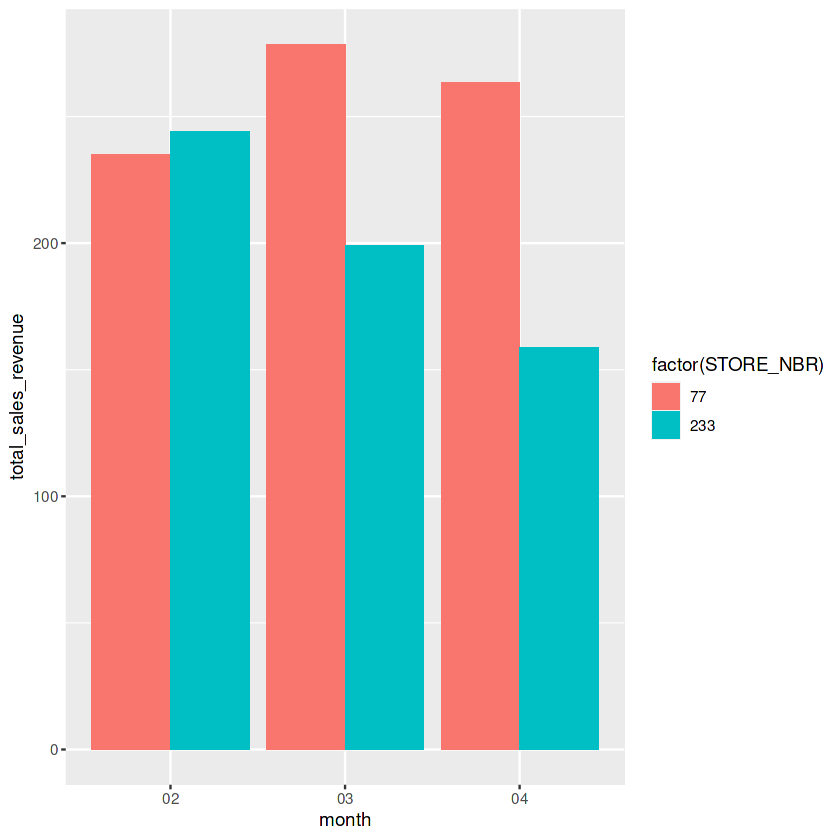

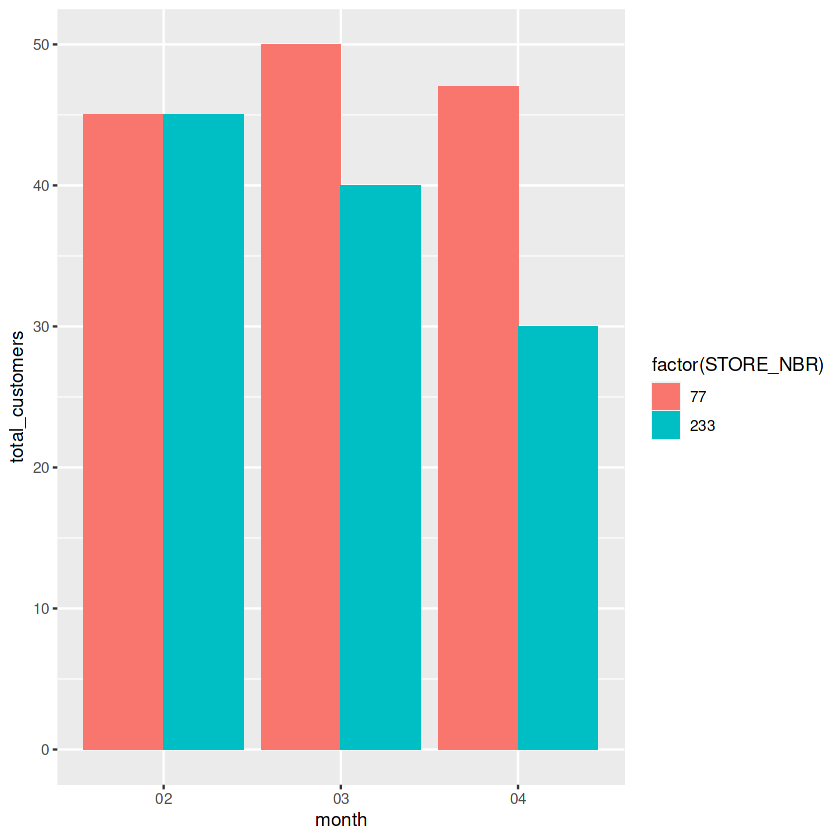

In [38]:
ggplot(df, aes(x = month, y = total_sales_revenue , fill = factor(STORE_NBR ))) + geom_bar(stat="identity", position = "dodge") 
ggplot(df, aes(x = month, y = total_customers , fill = factor(STORE_NBR ))) + geom_bar(stat="identity", position = "dodge") 

In [39]:
df <- annual_metrics %>% select(STORE_NBR, month, year,total_sales_revenue,total_customers,avgTxnPerCust,nChipsPerTxn ) %>% filter((STORE_NBR == 86 | STORE_NBR == 155) & (month == '02' | month == '03' | month == '04')) %>% distinct(.keep_all = TRUE)

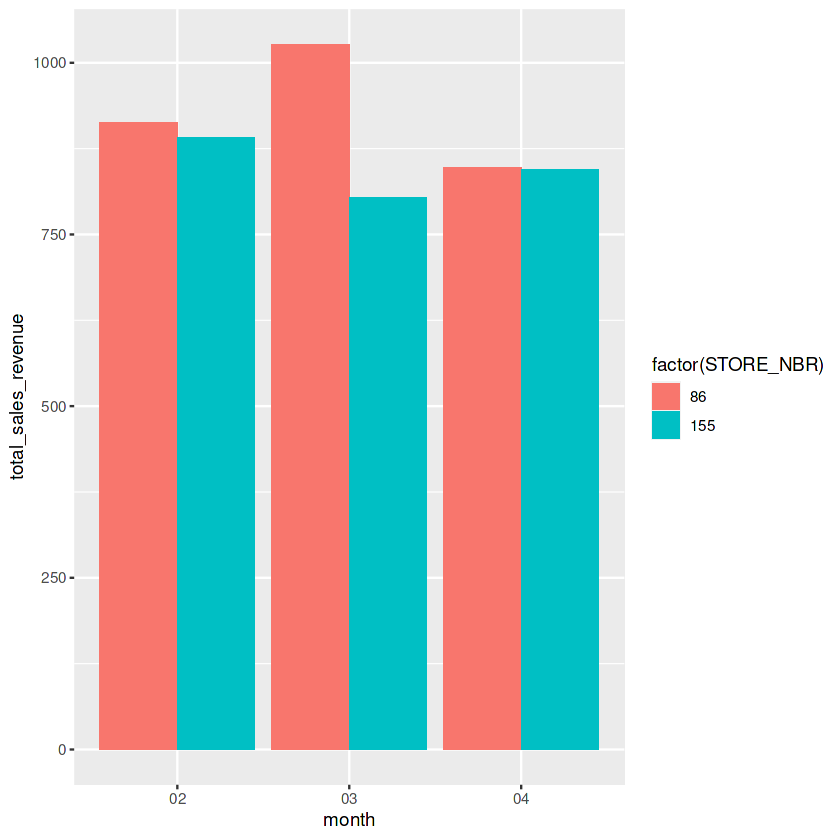

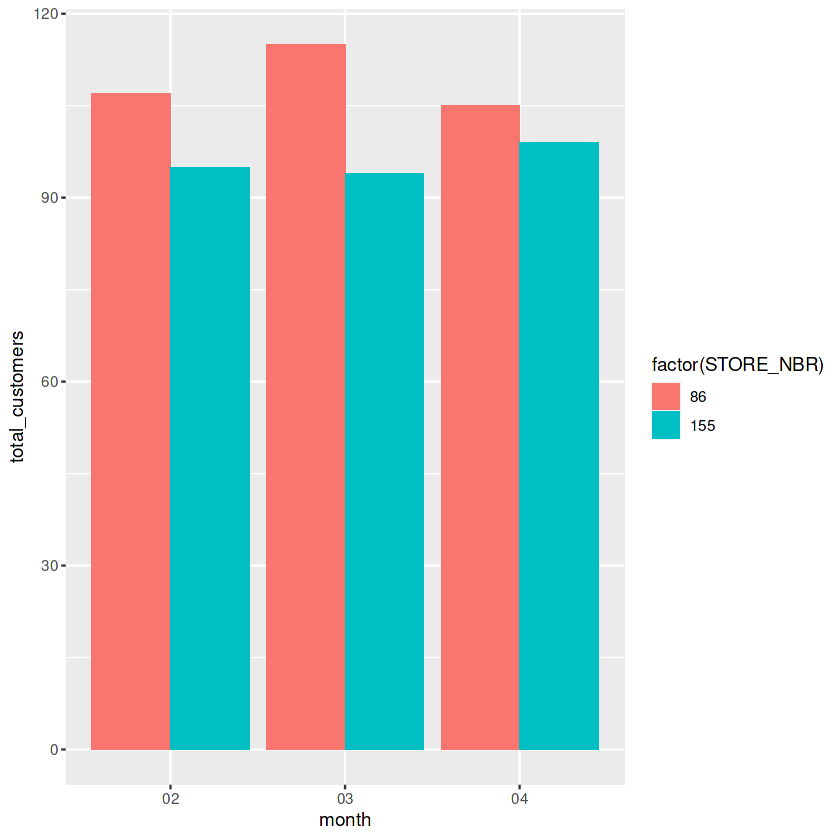

In [40]:
ggplot(df, aes(x = month, y = total_sales_revenue , fill = factor(STORE_NBR ))) + geom_bar(stat="identity", position = "dodge") 
ggplot(df, aes(x = month, y = total_customers , fill = factor(STORE_NBR ))) + geom_bar(stat="identity", position = "dodge") 

In [41]:
df <- annual_metrics %>% select(STORE_NBR, month, year,total_sales_revenue,total_customers,avgTxnPerCust,nChipsPerTxn ) %>% filter((STORE_NBR == 88 | STORE_NBR == 237) & (month == '02' | month == '03' | month == '04')) %>% distinct(.keep_all = TRUE)

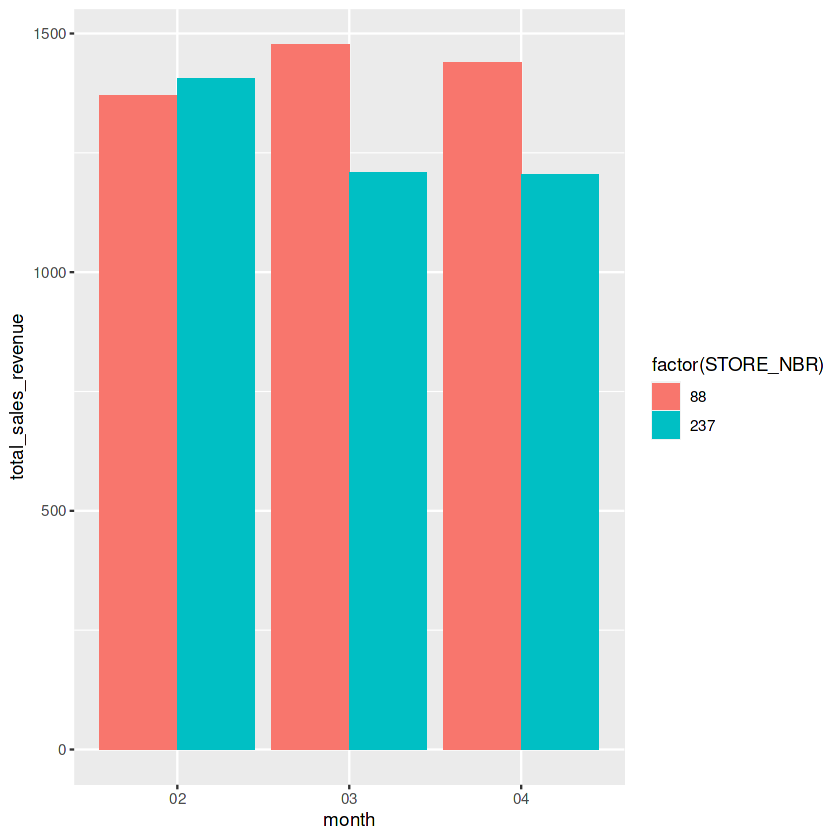

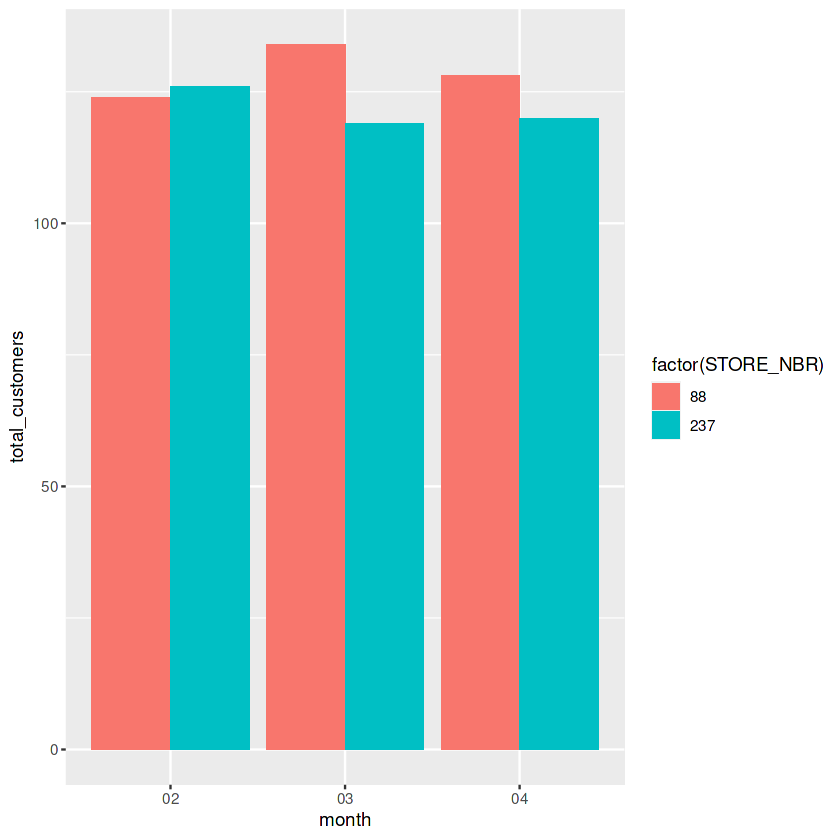

In [42]:
ggplot(df, aes(x = month, y = total_sales_revenue , fill = factor(STORE_NBR ))) + geom_bar(stat="identity", position = "dodge") 
ggplot(df, aes(x = month, y = total_customers , fill = factor(STORE_NBR ))) + geom_bar(stat="identity", position = "dodge") 